In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import mne
from mne.datasets import p

Random with sampling rate =100 and a baseline time of 500ms

In [3]:
signal = np.random.uniform(0.0, 2.0, 2500*50)

# Split to trials
trials = np.array(np.array_split(signal, 50)) # (50, 40/20)

Real signal (P300 from MNE)

In [59]:
# df = pd.read_csv("p300-6trials-12rep-chaky.csv")

df = pd.read_csv("data_2017-02-04-16_03_08.csv")


from datetime import datetime

timestamp = 1545730073
timestampsArr = df["timestamps"].apply(datetime.fromtimestamp)
# 4 ms each step

df = df.drop(["timestamps"], axis=1)

#channels named according to how EEG is plugged
# channels = ['timestamps', 'P4', 'Pz', 'P3', 'PO4', 'POz', 'PO3', 'O2', 'O1', 'Marker']   
# df.columns = channels

channels = ["TP9","AF7","AF8","TP10","Right" "AUX","Marker"]
df.columns = channels

# Marker
# 0: nothing happens
# 1: flash on non-target
# 2: flash on target

In [68]:
df.head()

,TP9,AF7,AF8,TP10,RightAUX,Marker
0,119.629,23.438,23.926,80.078,77.148,0
1,54.199,27.344,28.320,73.730,96.680,0
2,-31.738,27.832,34.180,59.082,73.730,0
3,-14.160,33.691,37.109,58.594,39.062,0
4,91.797,33.203,29.785,65.430,-17.578,0


In [64]:
info = mne.create_info(ch_names = channels, sfreq = 100)
mneObj = mne.io.RawArray(df.transpose(), info)

Creating RawArray with float64 data, n_channels=6, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   307.310 secs
Ready.


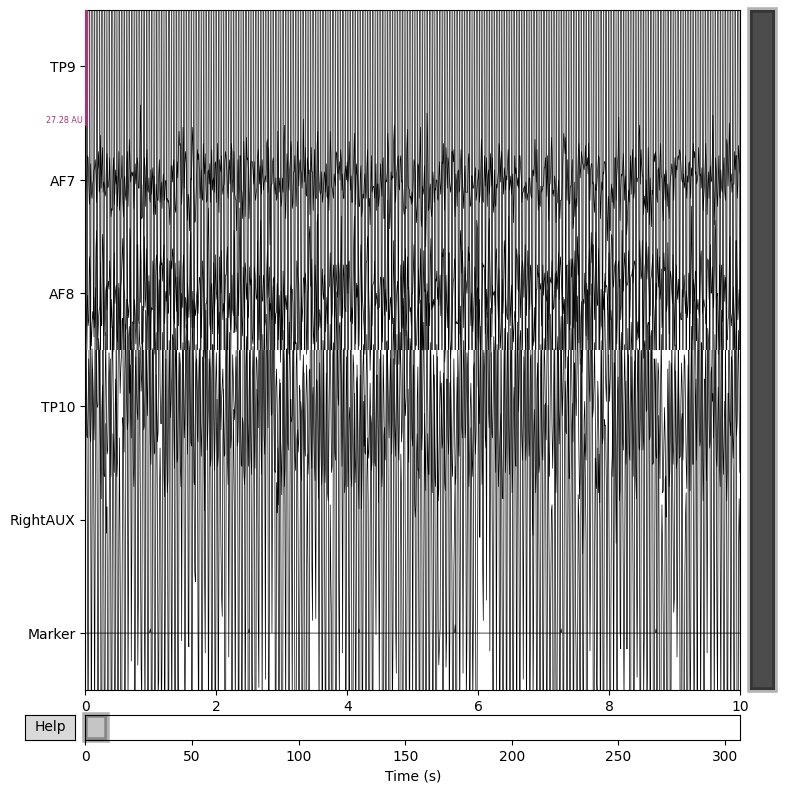

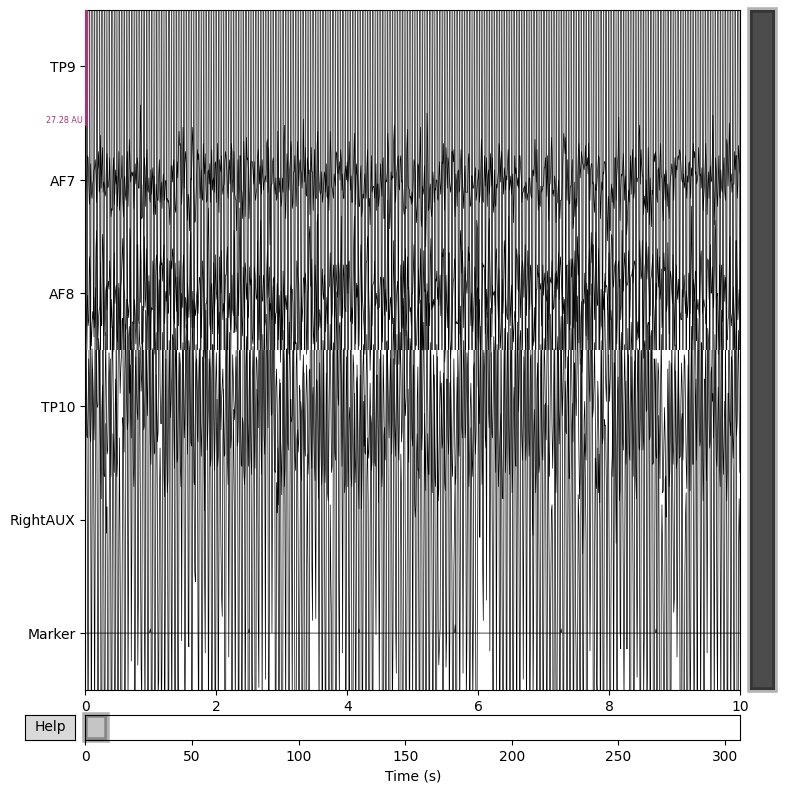

In [66]:
mneObj.plot()

In [21]:
def DFT(signal, fs):
    # reconstructing the waves using rotating vectors exploiting discrete signals harmonics feature
    N = len(signal)
    nyquist = fs/2
    coeff = []
    freq = np.array(list(range(0, N-1)))
    sine_t = np.linspace(0, N-1, N)/N

    # Generating different signals anf integrating 
    for i in range(N-1):
        sine_wave = np.exp(-2*np.pi*(1j)*freq[i]*sine_t)
        coeff.append(sine_wave@np.transpose(signal))  # integration
    
    reconstructed_signals = np.zeros((1, N), dtype = 'complex')
    coeff = np.array(coeff)
    coeff = coeff/ N

    # ptsHz = np.linspace(0,nyquist,(N/2)+1); 
    amp  = np.sqrt(coeff.real**2 + coeff.imag**2)*2
   
    return freq[:len(freq)//2] , amp[:len(amp)//2]

In [22]:
def plotFreq(freq, amp):
    plt.plot(freq, amp[:len(freq)])
    # pts_hz = np.linspace(0,nyquist,int((N/2)+1));
    # m = list(map(lambda x: x*2, sine_t))
    # t = np.linspace(-np.pi, np.pi, 1000)
    # plt.plot(t, reconstructed_signals.real.reshape(-1))
    # plt.grid(True, which='both')
    # plt.axhline(y=0, color='k')
    plt.show()


Time Frequency Analysis

In [69]:
def tf_analysis(trials, windowSize = 100, overlapping = 50):
    new_trial = []
    for trial in trials:
        temp = [DFT(trial[i : i + windowSize], 100)[0] for i in range(0, len(trial), overlapping)]
        new_trial.append(temp)

t1 --> freq1
t2 --> freq2

In [ ]:
def pltTF():

    # fig, ax = plt.subplots(2, figsize=(8, 7))
    # f, t, Sxx = signal.spectrogram(x, fs)
    # ax[0].pcolormesh(t, f, Sxx)
    # ax[0].set_ylabel('Frequency [Hz]')
    # ax[0].set_xlabel('Time [sec]')
    # # Note, if using output that is not one sided, then use the following:
    # f, t, Sxx = signal.spectrogram(x, fs, return_onesided=False)
    # ax[1].pcolormesh(t, fftshift(f), fftshift(Sxx, axes=0))
    # ax[1].set_ylabel('Frequency [Hz]')
    # ax[1].set_xlabel('Time [sec]')
    # plt.show()

Inter Trial Phase Consistency

In [ ]:
def ITPC():
    